# Import library and load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [2]:
train_data = pd.read_csv('marketing_campaign.csv',sep='\t')

In [3]:
train_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Understanding the dataset

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
train_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
train_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Some problems of the dataset:
1. The column "Dt_Customer" is of the object data type instead of a date data type.
2. The "Income" column has missing values.
3. There are categorical variables like "Marital Status" and "Education" that will need to be encoded into numeric form later.

In [7]:
train_data.shape

(2240, 29)

# Data Cleaning

## Missing value

In [8]:
#Remove the NA values
train_data = train_data.dropna()

In [9]:
#Check the dataset after remove NA values
train_data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Feature Engineering

### Feature Transformation

In [12]:
#Convert the type of Dt_Customer to Datetime
train_data['Dt_Customer'] = pd.to_datetime(train_data['Dt_Customer'])
print(train_data['Dt_Customer'].dtype)

datetime64[ns]


In [13]:
#Marital_Status
print("Total categories in the Marital_Status:\n", train_data["Marital_Status"].value_counts(), "\n")

Total categories in the Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 



Because some answers have similar meanings, we can group them together: "Married" and "Together" as "Married"; "Single," "Alone," "Absurd," and "YOLO" as "Single."

In [14]:
# Group the marital status into broader categories
train_data['Marital_Status'].replace(to_replace = ['Married','Together'], value = 'Married', inplace = True)
train_data['Marital_Status'].replace(to_replace = ['Single','Alone','Absurd','YOLO'], value = 'Single', inplace = True)

In [15]:
train_data['Marital_Status'].value_counts()

Married     1430
Single       478
Divorced     232
Widow         76
Name: Marital_Status, dtype: int64

In [16]:
#Education
print('Total categories in Education:\n', train_data['Education'].value_counts(),'\n')

Total categories in Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 



### Feature extraction

In [17]:
#Create the column about age of customer
train_data['Age'] = 2024 - train_data['Year_Birth']

In [18]:
#Create the column about number of children
train_data['Children'] = train_data['Kidhome'] + train_data['Teenhome']
train_data['Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2216, dtype: int64

In [19]:
#Create the column about whether a customer is a parent or not
train_data['Parent'] = train_data['Children'].apply(lambda x: 1 if x > 0 else 0)
train_data['Parent']

0       0
1       1
2       0
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Parent, Length: 2216, dtype: int64

In [20]:
#Create the column about number of year since customer
train_data["Num_year_since_customer"] = 2024 - train_data['Dt_Customer'].dt.year

In [21]:
#Creat the column about total spent
train_data['Total_Spent'] = (train_data['MntWines'] + 
                                train_data['MntFruits'] + 
                                train_data['MntMeatProducts'] + 
                                train_data['MntFishProducts'] +
                                train_data['MntSweetProducts'] +
                                train_data['MntGoldProds'])

In [22]:
#Create the column about the ratio between total spent and income
train_data['Ratio_Spent_Income'] = train_data['Total_Spent'] *100 / train_data['Income']

In [23]:
#Rename some columns to clarify
train_data = train_data.rename(columns={"MntWines": "Wines",
                          "MntFruits":"Fruits",
                          "MntMeatProducts":"Meat",
                          "MntFishProducts":"Fish",
                          "MntSweetProducts":"Sweets",
                          "MntGoldProds":"Gold"})
train_data = train_data.rename(columns = {"NumWebPurchases": "Website",
                                          "NumCatalogPurchases":"Catalog",
                                          "NumStorePurchases":"Stores"})

In [24]:
train_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Parent,Num_year_since_customer,Total_Spent,Ratio_Spent_Income
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,67,0,0,12,1617,2.781313
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,70,2,1,10,27,0.058260
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,59,0,0,11,776,1.083602
3,6182,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,40,1,1,10,53,0.198904
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,43,1,1,10,422,0.723929


### Feature Selection

In [25]:
#Drop some columns that are redundant features
list_drop = ['ID','Year_Birth','Dt_Customer','Z_CostContact',
             'Z_Revenue','AcceptedCmp3', 'AcceptedCmp4', 
             'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 
             'Complain', 'Response']
train_data = train_data.drop(list_drop, axis = 1)

Text(0.5, 1.0, 'Box plot of income')

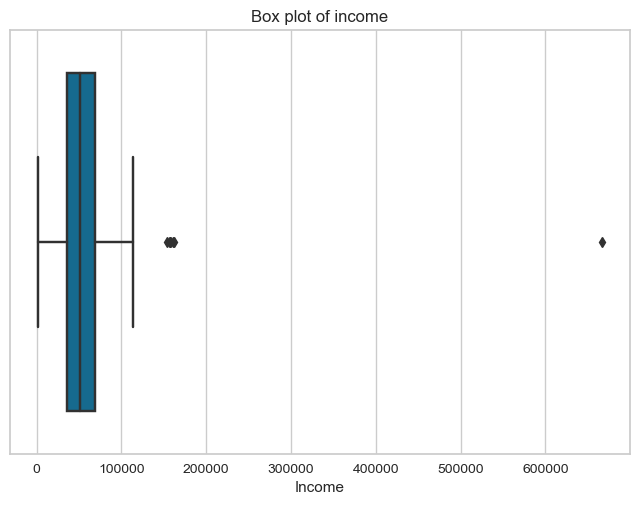

In [26]:
#Find outlier
sns.boxplot (x = train_data['Income'])
plt.xlabel ('Income')
plt.title ('Box plot of income')

Text(0.5, 1.0, 'Box plot about age of customers')

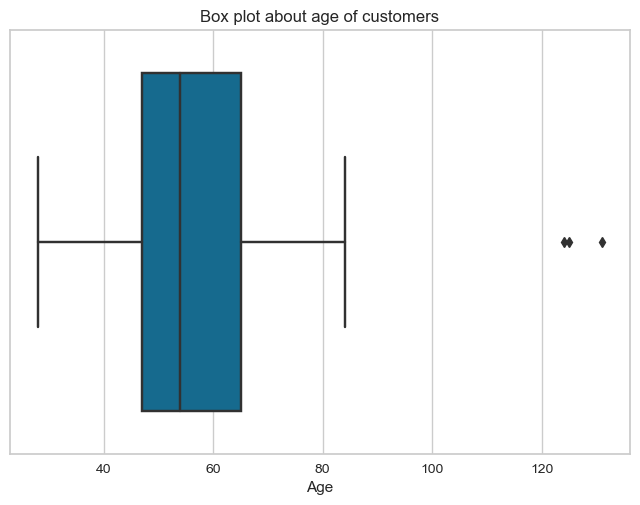

In [27]:
sns.boxplot (x = train_data['Age'])
plt.xlabel ('Age')
plt.title ('Box plot about age of customers')

Based on the boxplot of Income and Age of the customers, we identified some outliers in both columns. Therefore, we've decided to delete entries where Income is greater than 600,000 and Age is greater than 90.

In [28]:
#Delete the outlier
train_data = train_data[train_data['Age'] < 90]
train_data = train_data[train_data['Income'] < 600000]
print("The total number of data-points after removing the outliers are:", len(train_data))

The total number of data-points after removing the outliers are: 2212


# Exploratory Data Analysis

In [29]:
train_data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Website,Catalog,Stores,NumWebVisitsMonth,Age,Children,Parent,Num_year_since_customer,Total_Spent,Ratio_Spent_Income
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,...,4.088156,2.672242,5.806510,5.321429,55.086347,0.947559,0.714286,10.971971,607.268083,0.991860
std,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,...,2.742187,2.927542,3.250939,2.425597,11.701599,0.749466,0.451856,0.685926,602.513364,1.682583
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,10.000000,5.000000,0.003898
25%,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,2.000000,0.000000,3.000000,3.000000,47.000000,0.000000,0.000000,11.000000,69.000000,0.235129
50%,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,4.000000,2.000000,5.000000,6.000000,54.000000,1.000000,1.000000,11.000000,397.000000,0.802731
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,6.000000,4.000000,8.000000,7.000000,65.000000,1.000000,1.000000,11.000000,1048.000000,1.553341
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,27.000000,28.000000,13.000000,20.000000,84.000000,3.000000,1.000000,12.000000,2525.000000,70.698815


In [30]:
train_data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'Website', 'Catalog', 'Stores',
       'NumWebVisitsMonth', 'Age', 'Children', 'Parent',
       'Num_year_since_customer', 'Total_Spent', 'Ratio_Spent_Income'],
      dtype='object')

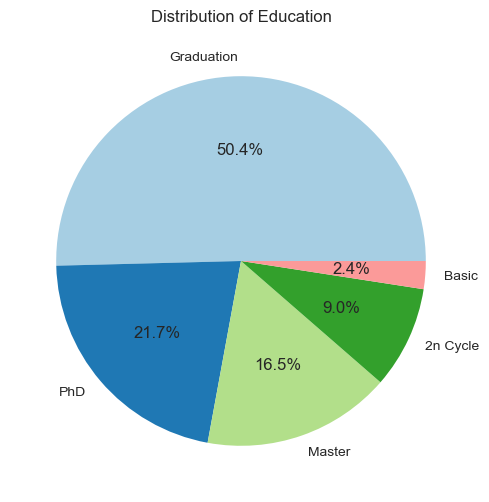

In [31]:
# Pie chart for Education
plt.figure(figsize = (10,6))
education_pie = train_data['Education'].value_counts()
plt.pie(education_pie, labels=education_pie.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(education_pie))))

# Customize the plot
plt.title('Distribution of Education')
plt.show()

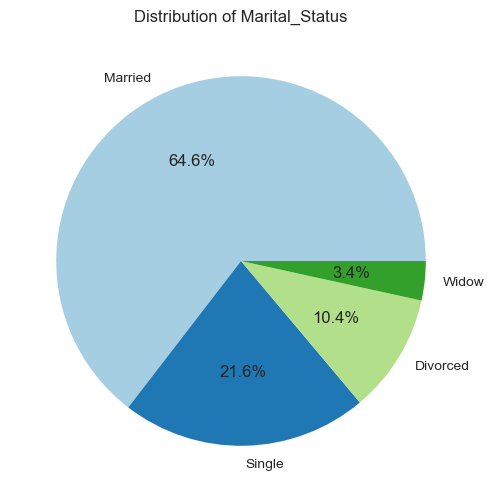

In [32]:
# Marital_Status
plt.figure(figsize = (10,6))
marital_pie = train_data['Marital_Status'].value_counts()
plt.pie(marital_pie, labels=marital_pie.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(marital_pie))))

# Customize the plot
plt.title('Distribution of Marital_Status')
plt.show()

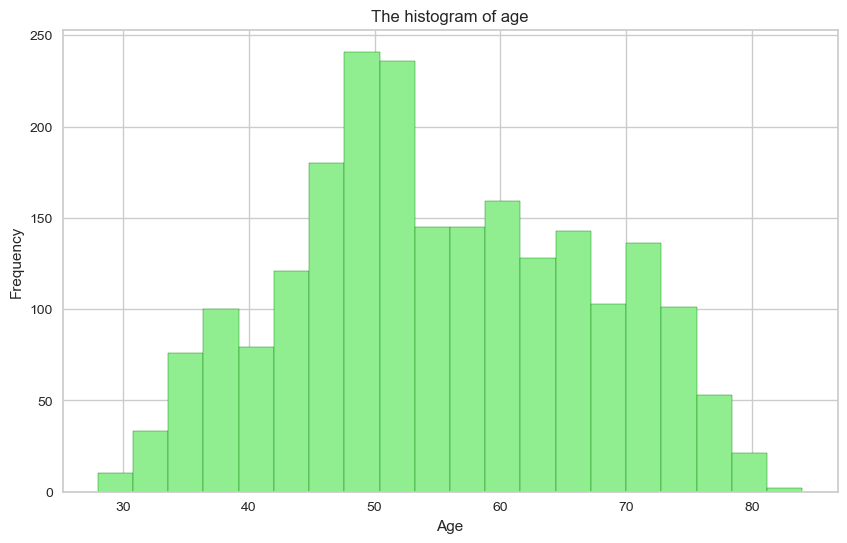

In [33]:
#Age
plt.figure(figsize=(10,6))
train_data['Age'].plot(kind ='hist', bins = 20, color = 'lightgreen', edgecolor ='green')
plt.title('The histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

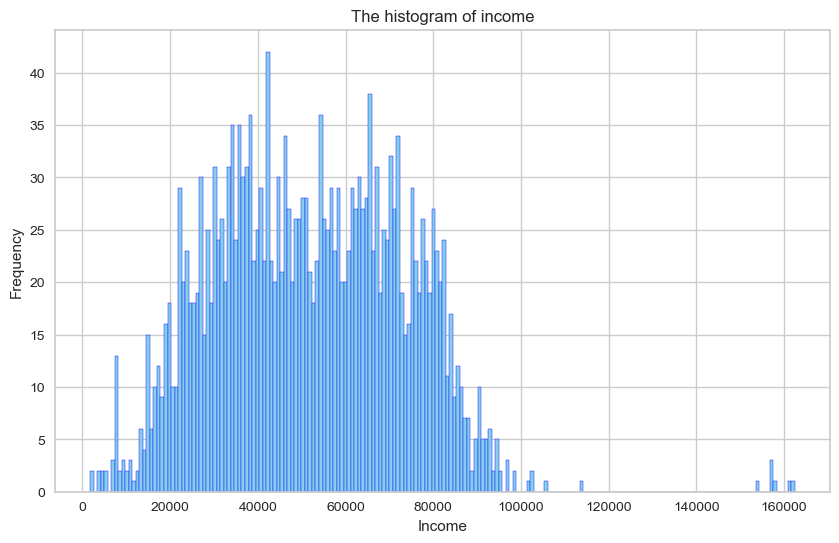

In [34]:
#Income
plt.figure(figsize = (10,6))
train_data['Income'].plot(kind ='hist', bins = 200, color ='skyblue', edgecolor = 'blue')
plt.title('The histogram of income')
plt.xlabel('Income')
plt.ylabel('Frequency')

In [35]:
np.median(train_data['Income'])

51371.0

In [36]:
train_data['Income'].describe()

count      2212.000000
mean      51958.810579
std       21527.278844
min        1730.000000
25%       35233.500000
50%       51371.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

The average income is 51,958.81. Most customers' income ranges from 1,730 to around 100,000, with only a few customers earning much higher incomes, around 160,000.

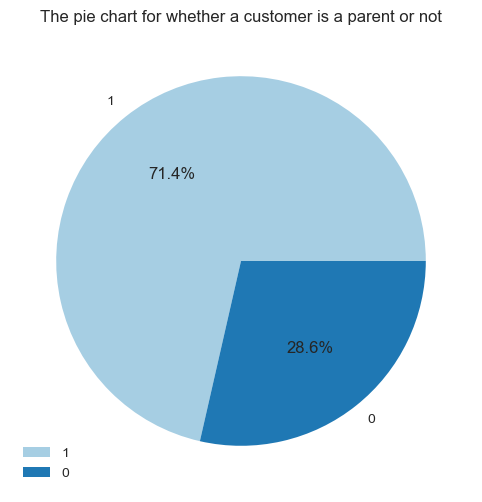

In [37]:
#Parents
plt.figure(figsize = (10,6))
parent_pie = train_data['Parent'].value_counts()
plt.pie(parent_pie, labels=parent_pie.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(parent_pie))))
plt.title('The pie chart for whether a customer is a parent or not')
plt.legend()

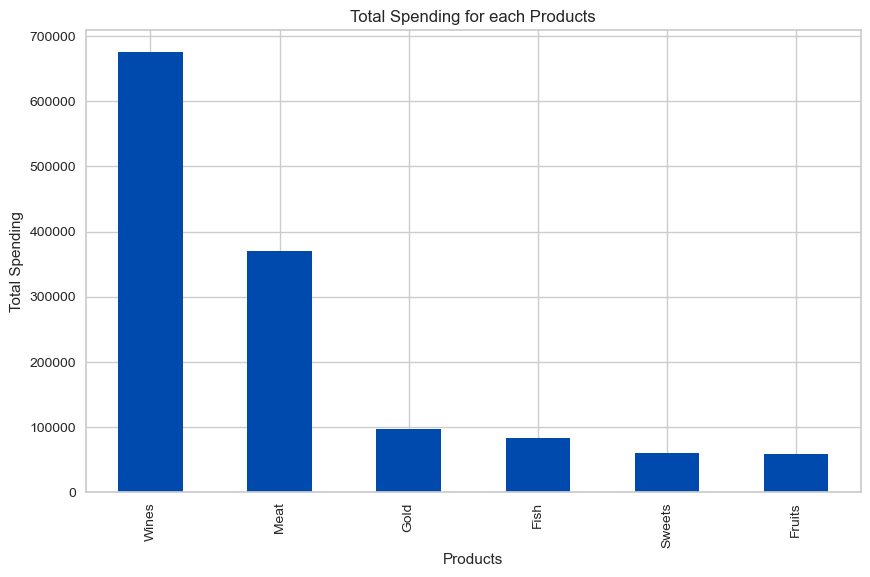

In [38]:
#Most frequently purchased products
products = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
total_spent = train_data[products].sum()
total_spent_sorted = total_spent.sort_values(ascending=False)
plt.figure(figsize = (10,6))
total_spent_sorted.plot(kind = 'bar', color ='#004aad')
plt.title('Total Spending for each Products')
plt.xlabel('Products')
plt.ylabel('Total Spending')
plt.show()

The two main products that customers primarily purchase are Wines and Meats. On the other hand, the remaining four product categories—Gold, Fish, Sweets, and Fruits—are bought the least, at nearly 1/7 of the amount spent on Wines and 1/4 of that spent on Meat.

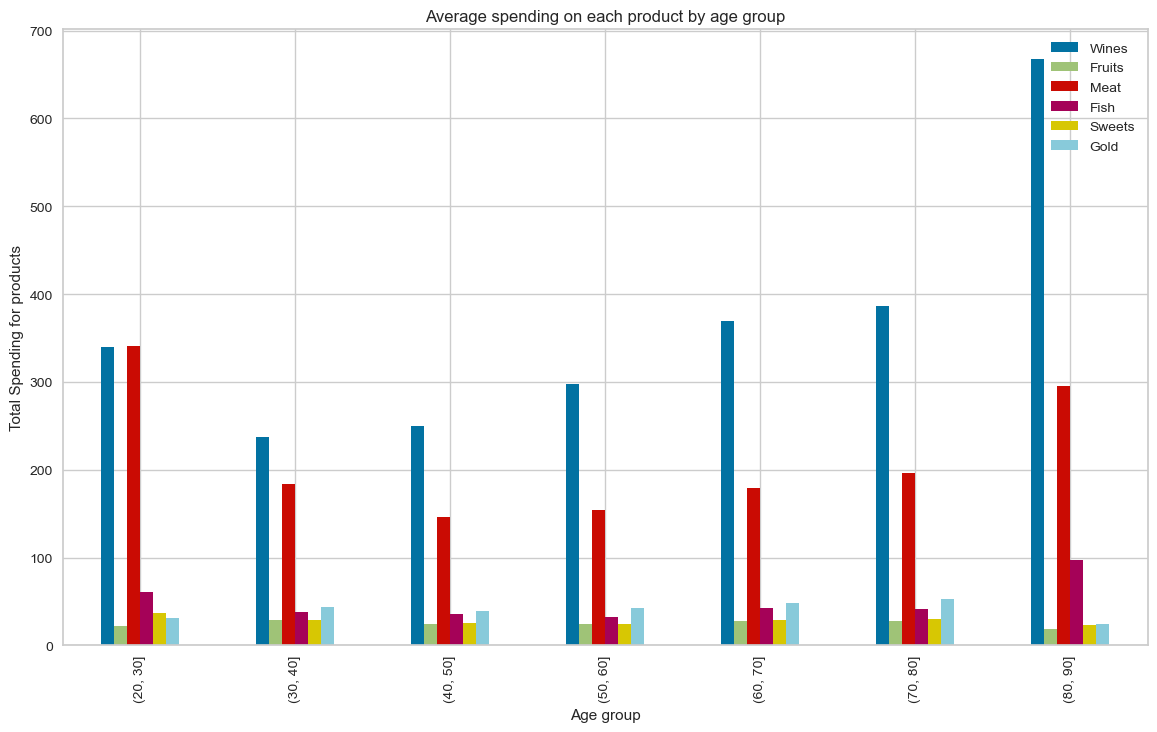

In [39]:
#Rate on spending products base on the different age group

age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
train_data['Age_group'] = pd.cut(train_data['Age'], bins = age_bins)
spending_by_age = train_data.groupby('Age_group')[products].mean()
spending_by_age.plot(kind='bar', figsize =(14,8))
plt.title('Average spending on each product by age group')
plt.xlabel('Age group')
plt.ylabel('Total Spending for products')
plt.show()

For the Wines category: all age groups overwhelmingly purchase more wines compared to other categories. The older the age group, the more they tend to buy wines, with the 80-90 age group spending up to 700 on wines, which is three times the amount spent by the 30-40 age group.

The second most purchased category is Meat, with the 20-30 age group buying the most.

For the Fish category, the 80-90 age group purchases the most.

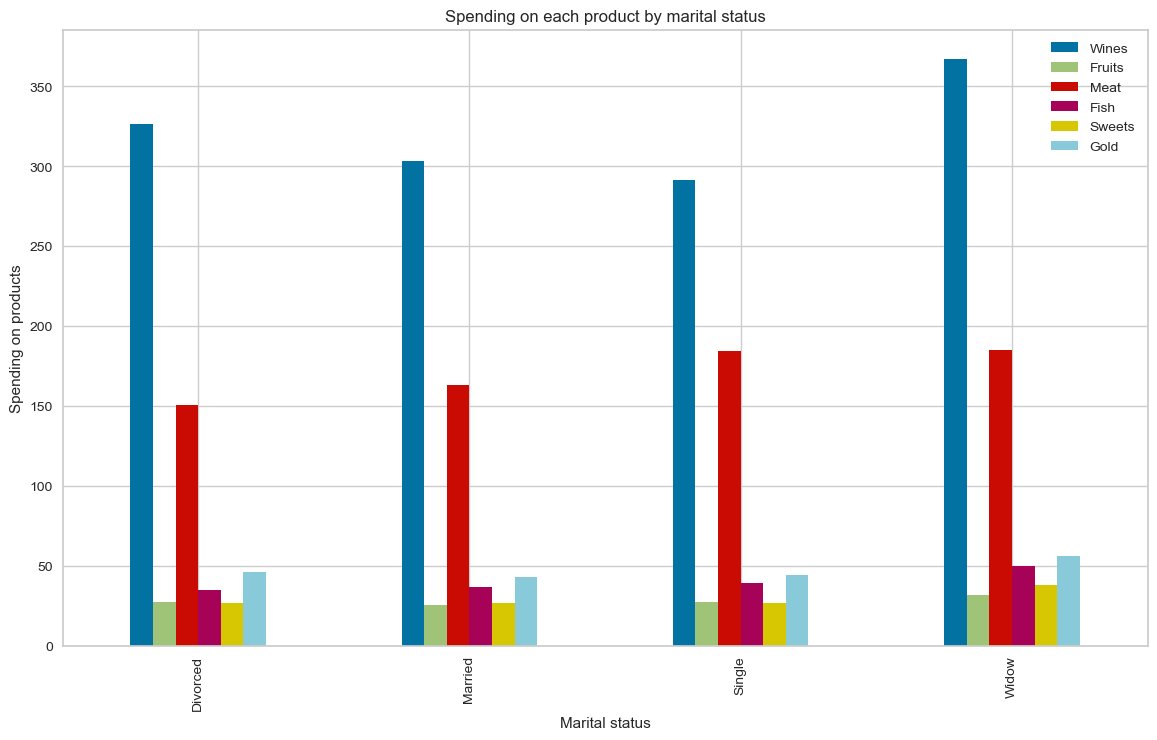

In [40]:
#Marital Status
spending_by_married = train_data.groupby('Marital_Status')[products].mean()
spending_by_married.plot(kind ='bar', figsize =(14,8))
plt.title('Spending on each product by marital status')
plt.xlabel('Marital status')
plt.ylabel('Spending on products')
plt.show()

In [41]:
# Rate of purchasing online different from purchasing in stores
purchasing = train_data[['Website','Catalog','Stores']].sum()

In [42]:
purchasing

Website     9043
Catalog     5911
Stores     12844
dtype: int64

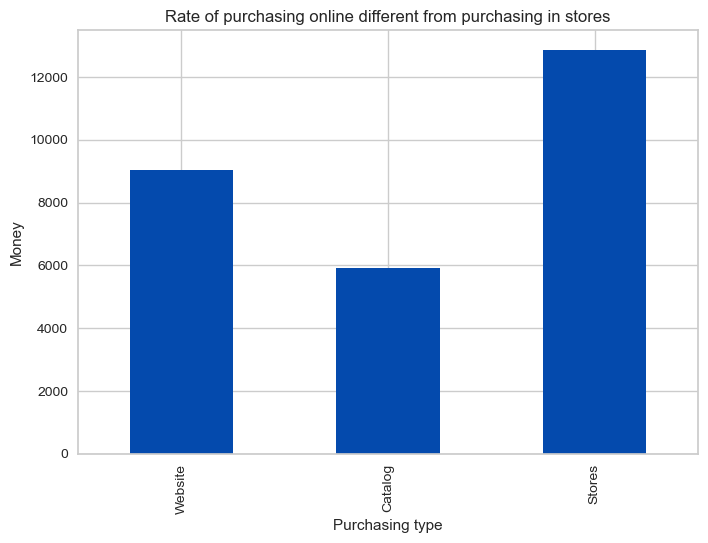

In [43]:
purchasing.plot(kind = 'bar', color ='#044aad')     
plt.title('Rate of purchasing online different from purchasing in stores')
plt.xlabel('Purchasing type')
plt.ylabel('Money')
plt.show()

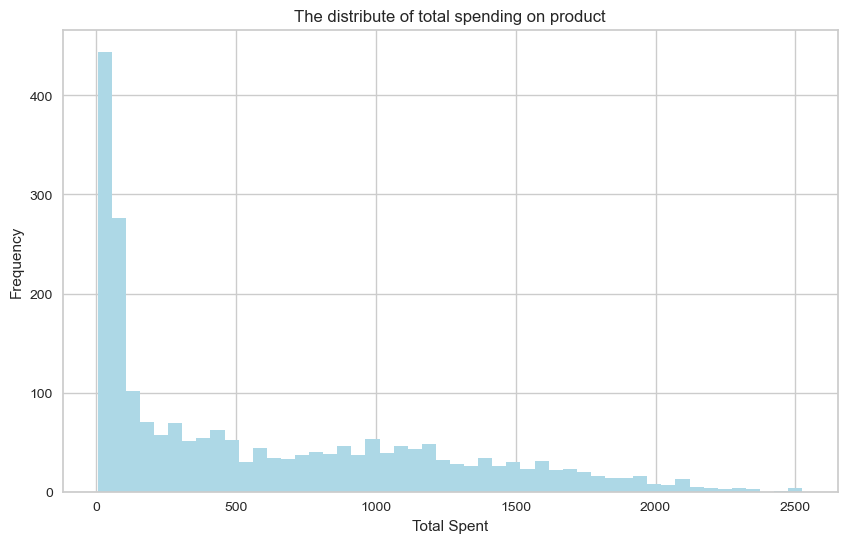

In [44]:
#Total Spent
plt.figure(figsize = (10,6))
train_data['Total_Spent'].plot(kind = 'hist', bins = 50, color ='lightblue')
plt.title('The distribute of total spending on product')
plt.xlabel('Total Spent')
plt.show()

In [45]:
train_data['Total_Spent'].describe()

count    2212.000000
mean      607.268083
std       602.513364
min         5.000000
25%        69.000000
50%       397.000000
75%      1048.000000
max      2525.000000
Name: Total_Spent, dtype: float64

## Apply Principal Component Analysis and K-means

### PCA

In [46]:
train_data_copy = train_data.copy()

In [47]:
train_data_copy = train_data_copy.drop(columns = ['Age_group'])

In [48]:
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                2212 non-null   object 
 1   Marital_Status           2212 non-null   object 
 2   Income                   2212 non-null   float64
 3   Kidhome                  2212 non-null   int64  
 4   Teenhome                 2212 non-null   int64  
 5   Recency                  2212 non-null   int64  
 6   Wines                    2212 non-null   int64  
 7   Fruits                   2212 non-null   int64  
 8   Meat                     2212 non-null   int64  
 9   Fish                     2212 non-null   int64  
 10  Sweets                   2212 non-null   int64  
 11  Gold                     2212 non-null   int64  
 12  NumDealsPurchases        2212 non-null   int64  
 13  Website                  2212 non-null   int64  
 14  Catalog                 

In [49]:
label_encoder = LabelEncoder()
# Apply Label Encoding for each categorical column
for column in train_data_copy.select_dtypes(include=['object']).columns:
    train_data_copy[column] = label_encoder.fit_transform(train_data_copy[column])

In [50]:
X_scaled = StandardScaler().fit_transform(train_data_copy)

In [52]:
#Initiating PCA to reduce dimentions aka features to 5
pca = PCA(n_components=5)
pca.fit(X_scaled)
PCA_ds = pd.DataFrame(pca.transform(X_scaled), columns=(["col1","col2","col3","col4","col5"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,1.142345e-16,2.849006,-5.600025,-2.606046,-0.793955,2.419683,9.288829
col2,2212.0,1.977522e-17,1.630343,-3.791084,-1.324527,-0.182114,1.197113,5.826680
col3,2212.0,5.395523e-17,1.251566,-3.986280,-0.836575,0.006499,0.773651,10.274670
col4,2212.0,6.153406e-17,1.101729,-4.950236,-0.677218,0.014995,0.692003,8.924044
col5,2212.0,4.418683e-17,1.029360,-2.605870,-0.612179,0.051418,0.598237,23.425104


Elbow Method to determine the number of clusters to be formed:


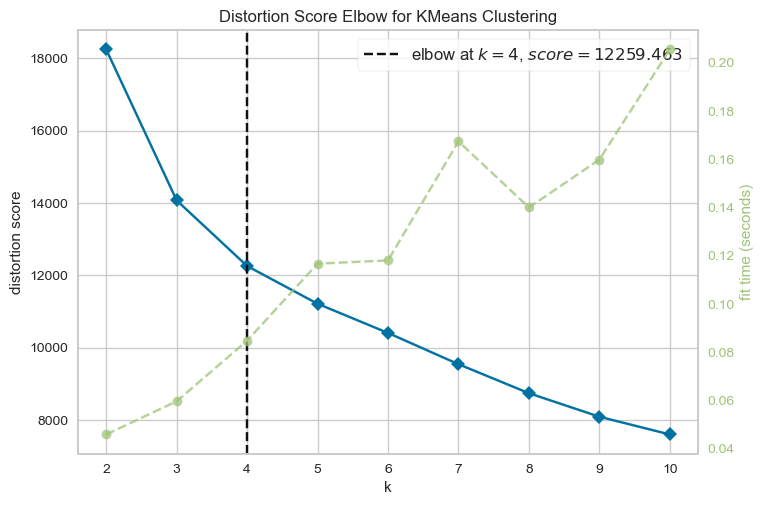

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The plot depict an elbow at four clusters.

In [60]:
# Fit a 4-cluster model.
kmeans4 = KMeans(n_clusters=4, random_state=42)
kmeans4.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [61]:
# Print unique labels.
print('Unique labels:', np.unique(kmeans4.labels_))

Unique labels: [0 1 2 3]


In [62]:
# Create a new column `cluster`.
train_data['cluster'] = kmeans4.labels_
train_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,Stores,NumWebVisitsMonth,Age,Children,Parent,Num_year_since_customer,Total_Spent,Ratio_Spent_Income,Age_group,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,4,7,67,0,0,12,1617,2.781313,"(60, 70]",2
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,5,70,2,1,10,27,0.058260,"(60, 70]",3
2,Graduation,Married,71613.0,0,0,26,426,49,127,111,...,10,4,59,0,0,11,776,1.083602,"(50, 60]",2
3,Graduation,Married,26646.0,1,0,26,11,4,20,10,...,4,6,40,1,1,10,53,0.198904,"(30, 40]",0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,6,5,43,1,1,10,422,0.723929,"(40, 50]",0


In [63]:
train_data.groupby(by=['cluster', 'Income']).size()

cluster  Income  
0        1730.0      1
         3502.0      1
         4861.0      1
         5305.0      1
         6560.0      1
                    ..
3        70829.0     1
         70844.0     1
         156924.0    1
         157733.0    1
         162397.0    1
Length: 1982, dtype: int64

In [64]:
cluster_counts = train_data['cluster'].value_counts()
cluster_counts

0    600
1    574
3    520
2    518
Name: cluster, dtype: int64

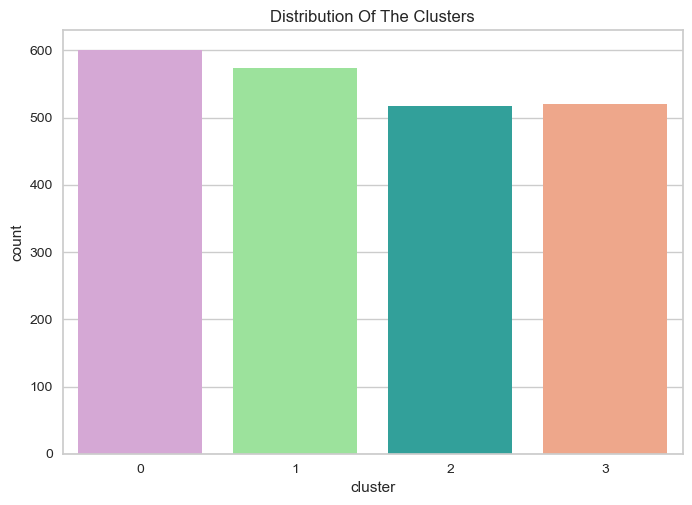

In [65]:
colors = ["#dda0dd","#90ee90","#20b2aa","#ffa07a"]
pl = sns.countplot(x=train_data["cluster"], palette= colors)
pl.set_title("Distribution Of The Clusters")
plt.show()

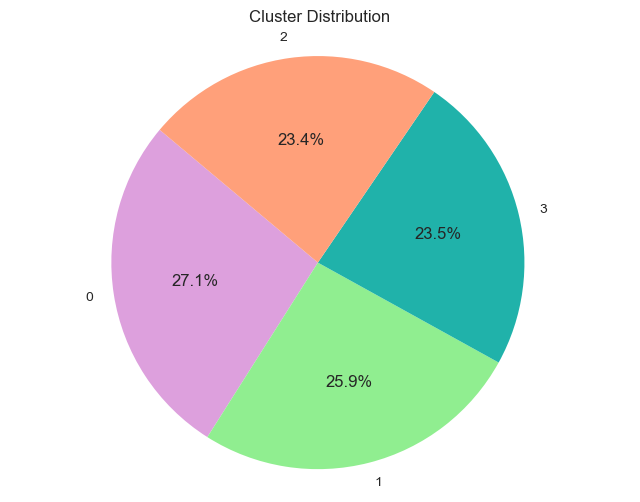

In [66]:
# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140,colors= colors)
plt.title('Cluster Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#Save the image below
plt.savefig("Pie Chart(clusters).png",dpi = 300,bbox_inches ="tight")
plt.show()

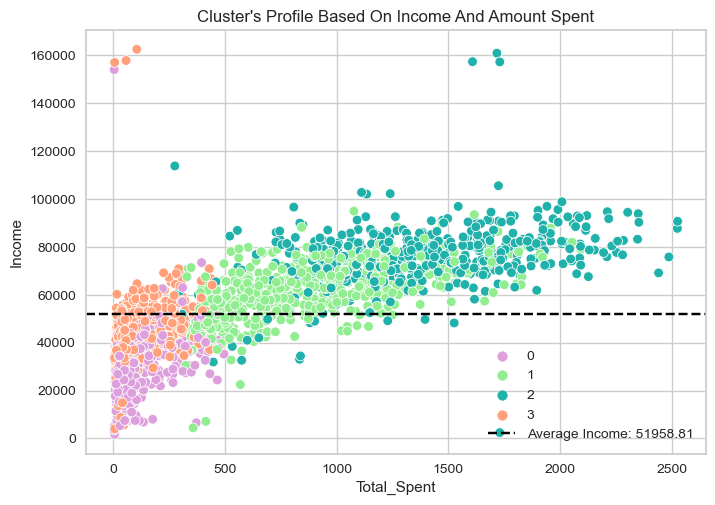

In [67]:
#Calculate average income
average_income = train_data['Income'].mean()

#Scatter plot about Total_Spent vs Income
pl = sns.scatterplot(data=train_data, x='Total_Spent', y='Income', hue='cluster', palette = colors)
pl.set_title("Cluster's Profile Based On Income And Amount Spent")
plt.axhline(y=average_income, color='black', linestyle='--', label=f'Average Income: {average_income:.2f}')
plt.legend()
plt.show()

Cluster 0: This group consists of customers with below-average income, the lowest among the four clusters, and low spending.

Cluster 1: This group consists of customers with mostly above-average income and high spending.

Cluster 2: This group consists of customers with income above the average salary and the highest spending.

Cluster 3: This group consists of customers with income fluctuating around the average salary, with moderate spending.


In [68]:
# Calculate the mean Income, and Amount each cluster spent
cluster_summary = train_data.groupby('cluster').agg({
    'Income': 'mean',
    'Total_Spent': 'mean',
    'Age': 'mean'
}).reset_index()

# Print the cluster summary
print(cluster_summary)

   cluster        Income  Total_Spent        Age
0        0  30065.551667   106.638333  47.091667
1        1  61113.961672   861.759582  58.761324
2        2  76040.496139  1381.330116  55.648649
3        3  43125.321154   132.913462  59.694231


<Figure size 800x550 with 0 Axes>

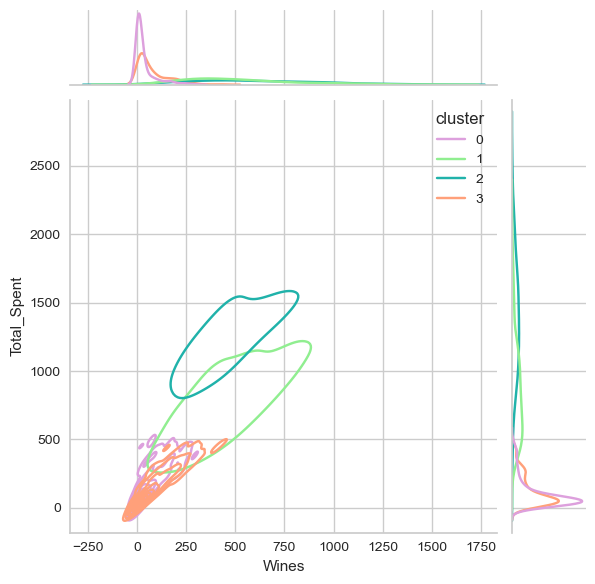

<Figure size 800x550 with 0 Axes>

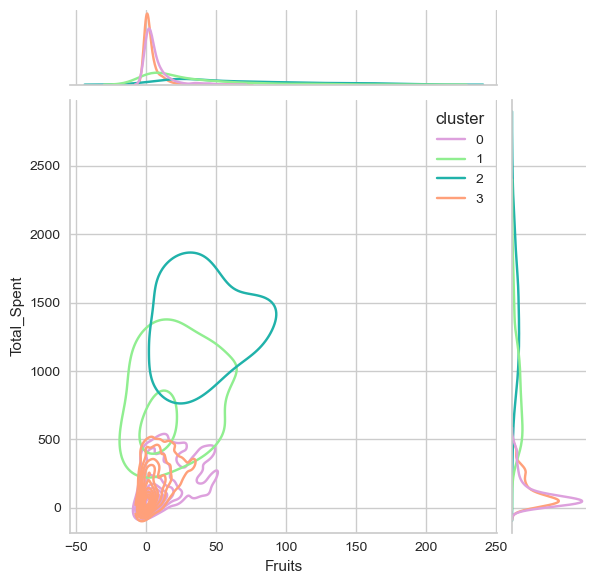

G:\Anaconda\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


<Figure size 800x550 with 0 Axes>

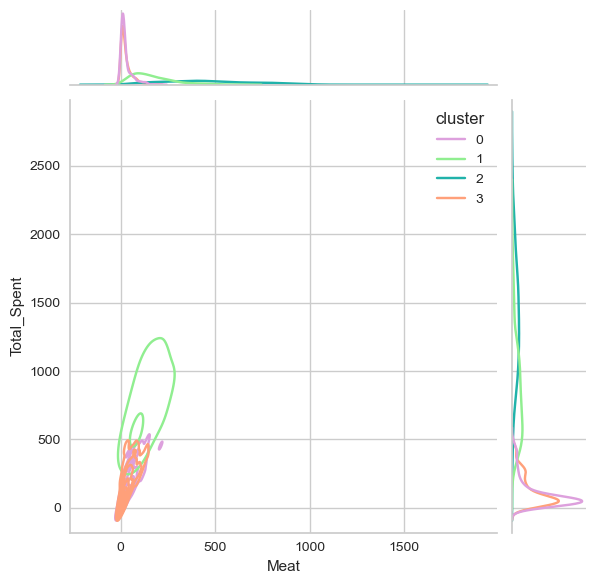

<Figure size 800x550 with 0 Axes>

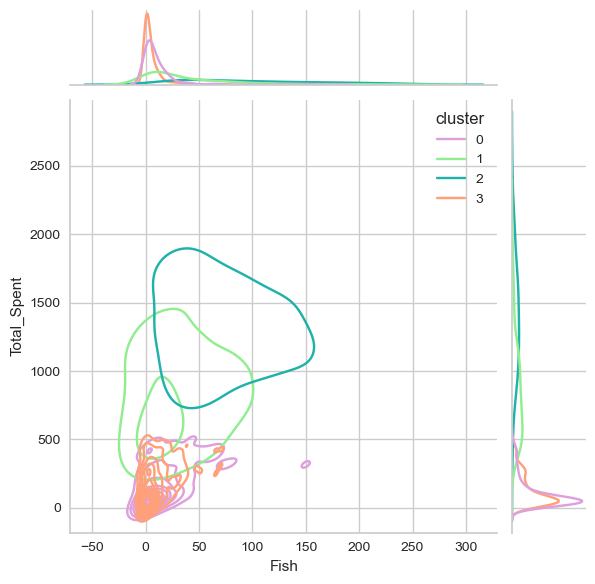

<Figure size 800x550 with 0 Axes>

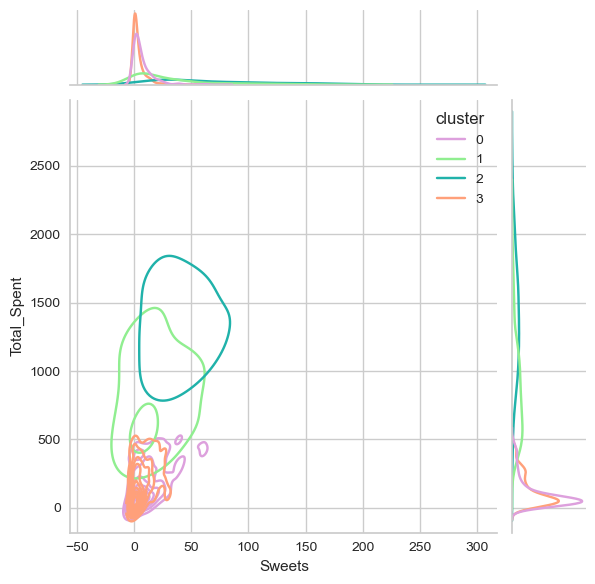

<Figure size 800x550 with 0 Axes>

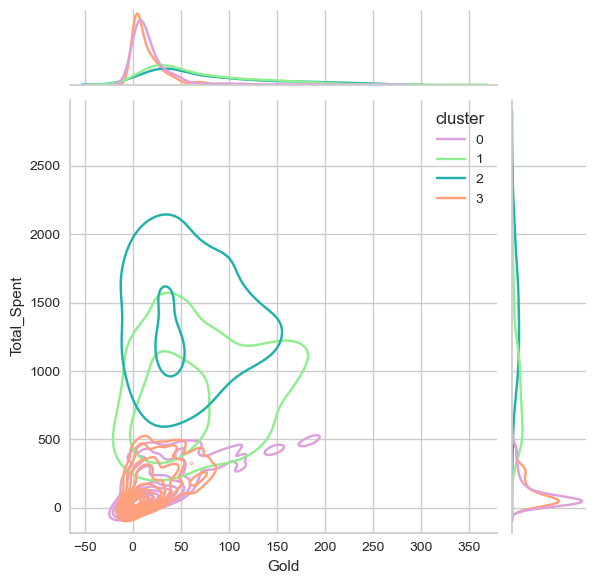

<Figure size 800x550 with 0 Axes>

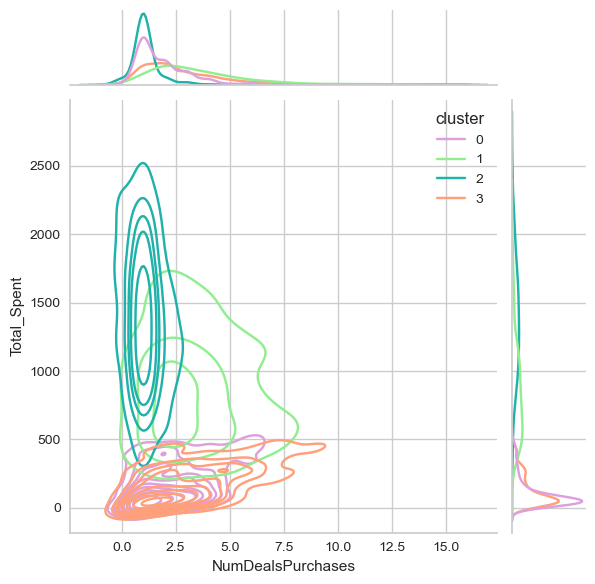

<Figure size 800x550 with 0 Axes>

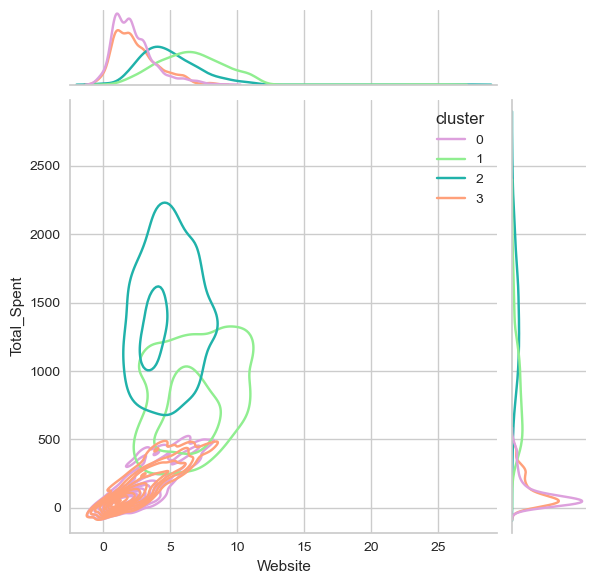

<Figure size 800x550 with 0 Axes>

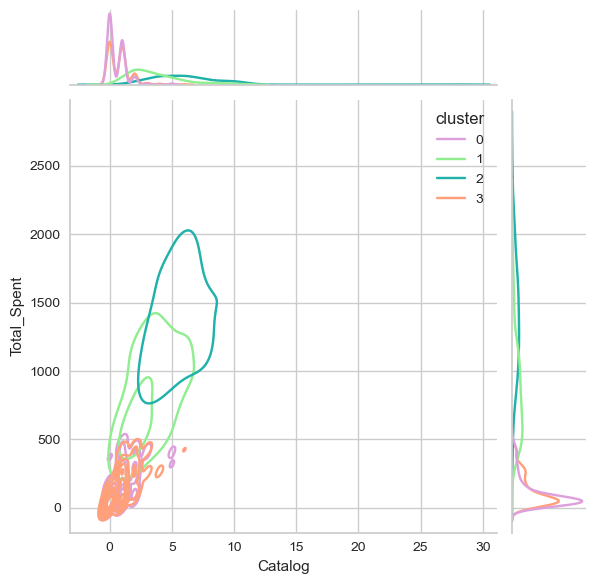

<Figure size 800x550 with 0 Axes>

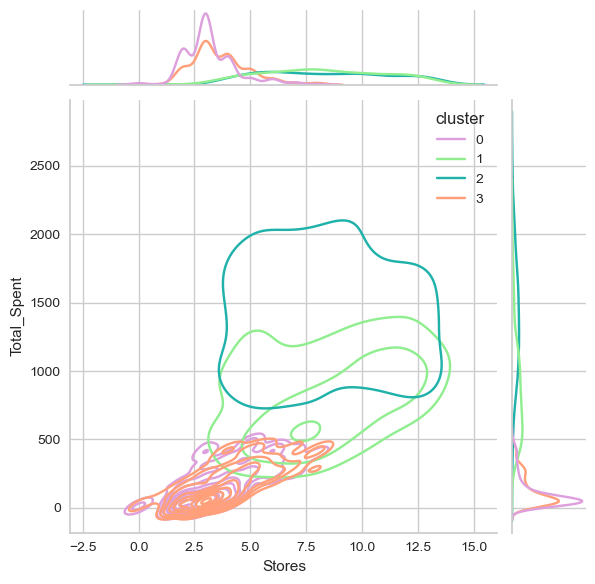

<Figure size 800x550 with 0 Axes>

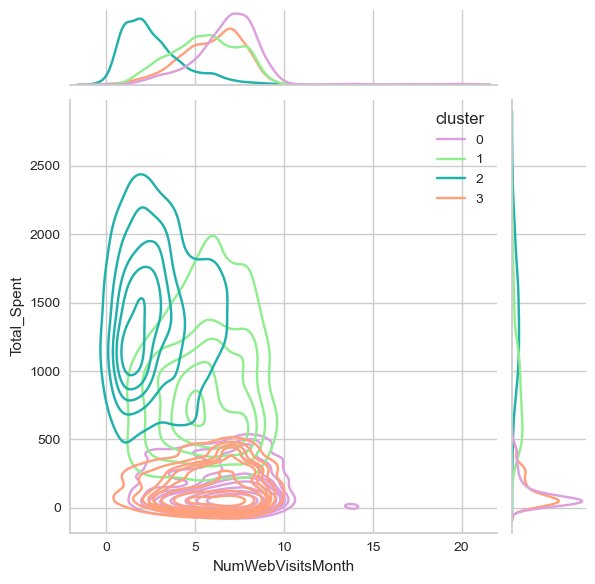

<Figure size 800x550 with 0 Axes>

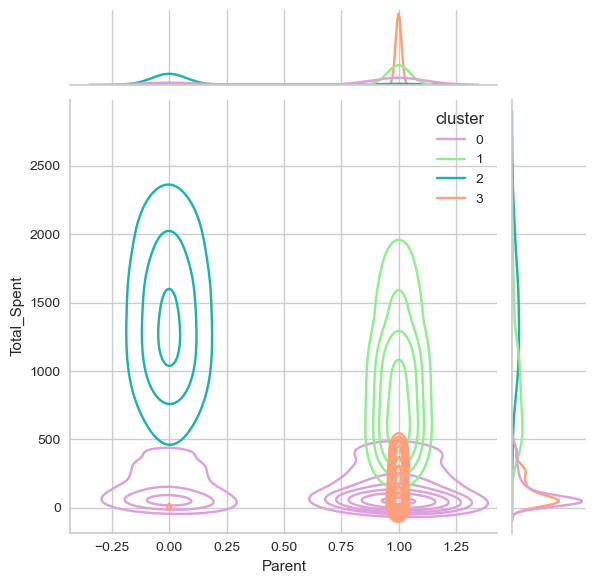

In [69]:
Personal = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'Website', 'Catalog', 'Stores',
       'NumWebVisitsMonth', 'Parent']

for i in Personal:
    plt.figure()
    sns.jointplot(x=train_data[i], y=train_data["Total_Spent"], hue =train_data["cluster"], kind="kde", palette=colors)
    plt.show()

Cluster 2 has a significantly higher purchase volume for items compared to Clusters 0 and 3 across all types of items except for Meat. However, when looking at the number of purchases with discount codes, Cluster 2 uses them relatively less, whereas the other clusters use discount codes more frequently.

In terms of shopping preferences, all groups prefer shopping at stores, with Cluster 1 and Cluster 2 showing a particular preference for in-store shopping.

Regarding website visit frequency, Clusters 1 and 2 visit the website relatively less compared to the other two clusters.

Additionally, having children affects shopping behavior: Cluster 2 mostly consists of individuals without children, while Clusters 1 and 3 are mostly composed of individuals with children.


# CONCLUSION

1. Cluster 0:

- Income: 30,065.5
- Amount Spent: 106.63
- Average Age: 47.09
- Rating:
    + This cluster has relatively lower income and spending compared to others.
    + They like to shop with discount codes and have a high frequency of browsing the company’s website.

2. Cluster 1:

- Income: 61,113.96
- Amount Spent: 861.76
- Average Age: 58.76
- Rating:
    + High income and spending levels, with a slightly older demographic.
    + This cluster shows higher income and moderate spending.
    + They have a lower frequency of browsing the website compared to clusters 0 and 3 and prefer shopping in stores.
    + Most of them have children.

3. Cluster 2:

- Income: 76,040.5
- Amount Spent: 1,381.33
- Average Age: 55.65
- Rating:
    + Highest income and spending levels.
    + They dominate purchases in all categories except for meat.
    + They do not have a habit of shopping with discount codes.
    + They have the lowest frequency of browsing the website and especially prefer shopping in stores.
    + Most of them do not have children.

4. Cluster 3:

- Income: 43,125.32
- Amount Spent: 132.91
- Average Age: 59.69
- Rating:
    + Moderate income and spendinG.
    + They like to shop with discount codes and have a high frequency of browsing the website.
    + Most of them have children.